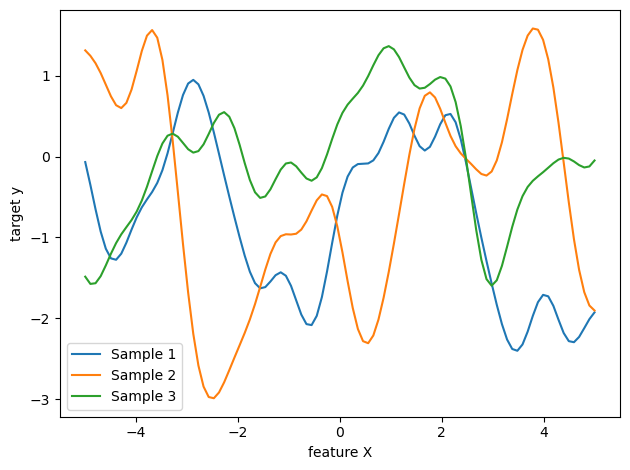

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, ExpSineSquared, DotProduct

kernel = RBF(length_scale=0.5)

gp = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, optimizer=None)

X = np.linspace(-5, 5, 100).reshape(-1,1)
samples = gp.sample_y(X, n_samples=3, random_state=0)

plt.figure()

for i in range(samples.shape[1]):
    plt.plot(X, samples[:, i], label=f"Sample {i+1}")

plt.xlabel('feature X')
plt.ylabel('target y')
plt.tight_layout()
plt.legend()
plt.show()

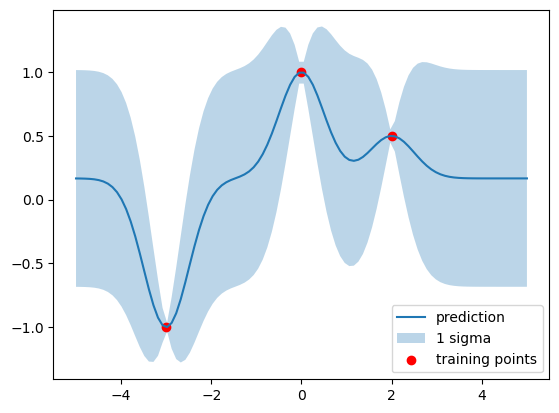

In [11]:
from sklearn.preprocessing import StandardScaler

X_train = np.array([[-3.0], [0.0], [2.0]])
y_train = np.array([[-1.0], [1.0], [0.5]])

scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(y_train.reshape(-1,1))

gp.fit(X_train, y_train_scaled)
y_pred_scaled, y_sigma_scaled = gp.predict(X, return_std=True)

y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_sigma = y_sigma_scaled * scaler.scale_  

#samples = gp.sample_y(X, n_samples=3)

plt.plot(X, y_pred, label="prediction")
#for i in range(samples.shape[1]):
#    plt.plot(X, samples[:, i], label=f"Sample {i+1}")
plt.fill_between(X.ravel(), y_pred - y_sigma, y_pred + y_sigma, alpha=0.3, label="1 sigma")
plt.scatter(X_train, y_train, c='r', label="training points")
plt.legend()
plt.show()